# Data Preparation and Backend
So this is a place where I would like to implement what I have learned in the Natural Language Understanding modules embodied in the previous notebooks.

## RASA Training
I try to see my training results using RASA's infrastructure first before I train it myself below.

### CLI Commands
    rasa init
    rasa train nlu
    rasa load nlu : (Loads the model and trains it again)
    
So these are some of the things that RASA uses to train their bot, and I use their model to train an intent classification and entity extraction model. Then I compared it to the work I did in the previous notebook.

If you would like to see my notes on how the bot works, it's stored in `progress/rasa_notes.md`.

In [102]:
import random
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}") # Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# Cool progress bars
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()  # Enable tracking of execution progress

import re
import collections
import yaml
import random

from IPython.core.display import display, HTML

# Loading in objects
train = pd.read_pickle('objects/train.pkl')

with open(r'objects/entities.yml') as file:
    entities = yaml.load(file, Loader=yaml.FullLoader)

Pandas: 1.0.5
Numpy: 1.18.5
Pandas: 1.0.5
Numpy: 1.18.5


/opt/anaconda3/envs/chatbot/lib/python3.7/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/opt/anaconda3/envs/chatbot/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# NER

In [103]:
# Data science
import pandas as pd
import numpy as np
import sklearn

# NER
import spacy
from spacy import displacy
import random
from spacy.matcher import PhraseMatcher
from pathlib import Path

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
import collections
import yaml
import pickle
import streamlit as st

from IPython.core.display import display, HTML

# Reading back in intents
with open(r"objects/intents.yml") as file:
    intents = yaml.load(file, Loader=yaml.FullLoader)

# Reading in training data
train = pd.read_pickle("objects/train.pkl")

# Reading in processed data
processed = pd.read_pickle("objects/processed.pkl")

# Read our trained models back in
hardware_nlp = pickle.load(open("models/hardware_big_nlp.pkl", "rb"))
app_nlp = pickle.load(open("models/app_big_nlp.pkl", "rb"))

# Testing out the results
test_text_hardware = "My iphone sucks but my macbook pro doesnt. Why couldnt they make\
            my iphone better. At least I could use airpods with it. Mcabook pro is\
            the best! Apple watches too. Maybe if they made the iphone more like the\
            ipad or my TV it would be alright. Mac. Ugh."
test_text_app = "My top favorite apps include the facetime application, the apple books on my iphone, and the podcasts\
        application. Sometimes instead of spotify I would listen to apple music. My macbook is running\
        Catalina btw."


def extract_hardware(user_input, visualize=False):
    """ Takes as input the user input, and outputs all the entities extracted. Also made a toggler for visualizing with displacy."""
    # Loading it in
    hardware_nlp = pickle.load(open("models/hardware_big_nlp.pkl", "rb"))
    doc = hardware_nlp(user_input)

    extracted_entities = []

    # These are the objects you can take out
    for ent in doc.ents:
        extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))

    # If you want to visualize
    if visualize == True:
        # Visualizing with displaCy how the document had it's entity tagged (runs a server)
        colors = {"HARDWARE": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
        options = {"ents": ["HARDWARE"], "colors": colors}
        html = displacy.render(doc, style = 'ent', options = options)
        display(HTML(html));

    return extracted_entities


def extract_app(user_input, visualize=False):
    """ Takes as input the user input, and outputs all the entities extracted. Also made a toggler for visualizing with displacy."""
    # Loading it in
    app_nlp = pickle.load(open("models/app_big_nlp.pkl", "rb"))
    doc = app_nlp(user_input)

    extracted_entities = []

    # These are the objects you can take out
    for ent in doc.ents:
        extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))

    # If you want to visualize
    if visualize == True:
        # Visualizing with displaCy how the document had it's entity tagged (runs a server)
        colors = {"APP": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
        options = {"ents": ["APP"], "colors": colors}
        html = displacy.render(doc, style = 'ent', options = options)
        display(HTML(html));
    return extracted_entities


# Test functionality
# print(extract_app(test_text_app))

# Actions

In [133]:
import random
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Data science
import pandas as pd
import numpy as np
import re
import collections
import yaml
import random

# Loading in objects
train = pd.read_pickle("objects/train.pkl")

with open(r"objects/entities.yml") as file:
    entities = yaml.load(file, Loader=yaml.FullLoader)

# Making a class to define all the actions to do when you are
class Actions:
    memory = {'hardware': [], 'app': []}
    def __init__(self):
        pass

    # If greet
    def utter_greet(self):
        # Storing the bank of responses
        return random.choice(
            [
                "Hi! My name is EVE. How may I assist you today?",
                "Hello. How may I be of help?",
            ]
        )

    # If goodbye
    def utter_goodbye(self):
        reaffirm = ["Is there anything else I could help you with?"]
        goodbye = [
            "Thank you for your time. Have a nice day!",
            "Glad I could be of help, have a nice day!",
        ]
        return random.choice(goodbye)

    # Speak to representative
    def link_to_human(self):
        return random.choice(["Alright. Let me direct you to a representative!"])

    def battery(self, entity):
        if entity == 'none':
            return random.choice(['What device are you using?', 'May I know what device you are using?'])
        else:
            return random.choice(["I'm sorry to hear about there. You can check the battery health in your\
                                  settings. If it is below 75%, please consider getting it replaced at your local apple store"])

    def forgot_pass(self):
        reset_appleid = 'https://support.apple.com/en-us/HT201355'
        return f"I'm sorry to hear about that, go to {reset_appleid}"

    def payment(self):
        return "Login with your Apple ID and update your payment method"

    def challenge_robot(self):
        return random.choice(
            [
                "You're funny. Of course I am a robot.",
                "Yes, and I was designed by Matthew to assist you.",
            ]
        )

    def update(self, entity):
        # Affirm hardware
        if entity == 'none':
            return random.choice(['What device are you using?', 'May I know what device you are using?'])
        elif hardware == 'macbook pro':
            return random.choice(['Find details on how to update your macbook pro here: https://support.apple.com/en-us/HT201541'])
        else:
            return random.choice(["I'm sorry to hear about there. You can check the battery health in your\
                                  settings. If it is below 75%, please consider getting it replaced at your local apple store"])
        
    def info(self, entity):
        if entity == 'macbook pro':
            return random.choice(['Okay! Right now we have 13 and 16 inch macbook pros. Please find more info here: https://www.apple.com/macbook-pro/'])
        if entity == 'ipad':
            return random.choice(['We have a few options for iPads ranging from '])
        if entity == 'none':
            return random.choice(['What would you like to get info on good sir?'])


In [141]:
a = Actions()
a.payment('macbook pro')

'Okay! Right now we have 13 and 16 inch macbook pros. Please find more info here: https://www.apple.com/macbook-pro/'

# Initialize Intent Classification

In [98]:
import re
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load intent classification model
from keras.models import load_model

import pandas as pd
import numpy as np

model = load_model("models/intent_classification.h5")

# Reading in training data
train = pd.read_pickle("objects/train.pkl")
# Functions required for initialization
get_max_token_length = lambda series: len(max(series, key=len))


def make_tokenizer(docs, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'):
    t = Tokenizer(filters=filters)
    t.fit_on_texts(docs)
    return t


pad_tweets = lambda encoded_doc, max_length: pad_sequences(
    encoded_doc, maxlen=max_length, padding="post"
)

# Initializing required variables

max_token_length = get_max_token_length(train["Utterance"])
token = make_tokenizer(train["Utterance"])
unique_intents = sorted(list(set(train["Intent"])))


def infer_intent(text):
    """ Takes as input an utterance an outputs a dictionary of intent probabilities """
    # Making sure that my text is a string
    string_text = re.sub(r"[^ a-z A-Z 0-9]", " ", text)

    # Converting to Keras form
    keras_text = token.texts_to_sequences(string_text)

    # Check for and remove unknown words - [] indicates that word is unknown
    if [] in keras_text:
        # Filtering out
        keras_text = list(filter(None, keras_text))
    keras_text = np.array(keras_text).reshape(1, len(keras_text))
    x = pad_tweets(keras_text, max_token_length)

    # Generate class probability predictions
    # You're using the overfit model to predict!
    intent_predictions = np.array(model.predict(x)[0])

    # Match probability predictions with intents
    pairs = list(zip(unique_intents, intent_predictions))
    dict_pairs = dict(pairs)

    # Output dictionary
    output = {
        k: v
        for k, v in sorted(dict_pairs.items(), key=lambda item: item[1], reverse=True)
    }

    return string_text, output


string_text, conf_dict = infer_intent("need info")

# Deploy

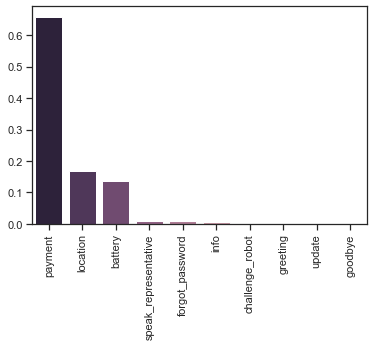

<IPython.core.display.HTML object>

[('macbook pro', 3, 14, 'HARDWARE')]


/opt/anaconda3/envs/chatbot/lib/python3.7/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<IPython.core.display.HTML object>

[]


,macbook pro,iphone,iphones,mac,ipad,watch,TV,airpods,app store,garageband,...,payment,location,battery,speak_representative,forgot_password,info,challenge_robot,greeting,update,goodbye
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.658146,0.167895,0.136584,0.010097,0.010085,0.004833,0.001305,0.000508,0.000272,0.00008


[('payment', 0.6581464409828186)]
max_intentpayment
macbook pro
Okay! Right now we have 13 and 16 inch macbook pros. Please find more info here: https://www.apple.com/macbook-pro/


In [149]:
def main():
    a = Actions()
    a.utter_greet()
    user_input = 'hi macbook pro'# input("Tell EVE something!")
    intents, hardware, app = initialize(user_input)
    user_input, prediction = intents
    # Initializing dialogue history
    columns = entities["hardware"] + entities["apps"] + list(prediction.keys())
    history_df = pd.DataFrame(dict(zip(columns, np.zeros(len(columns)))), index=[0])
    
    # Converting to dialogue history entry, then appending it to a dataframe
    history_df = history_df.append(to_row(prediction, hardware, app), ignore_index = True)
    
    display(history_df)
    
    # Mapping action
    max_intent, extracted_entities = action_mapper(history_df)
    
    entity = extracted_entities[0]
    
    if max_intent == 'greeting':
        print(a.greeting())
    elif max_intent == 'info':
        print(a.info())
    elif max_intent == 'update':
        print(a.update())
    elif max_intent == 'forgot_password':
        print(a.forgot_pass())
    elif max_intent == 'challenge_robot':
        print(a.challenge_robot())
    elif max_intent == 'goodbye':
        print(a.utter_goodbye())
    elif max_intent == 'payment':
        print(a.payment(entity))
    

def to_row(prediction, hardware, app):
    row = []
    
    # Hardware
    if hardware == []:
        for i in range(len(entities['hardware'])):
            row.append(0)
    else:
        for entity in entities['hardware']:
            if hardware[0][0] == entity:
                row.append(1)
            else:
                row.append(0)
    
    # App
    if app == []:
        for i in range(len(entities['apps'])):
            row.append(0)
    else:
        for entity in entities['apps']:
            if app[0][0] == entity:
                row.append(1)
            else:
                row.append(0)
    
    # Prediction - inserting all the probabilities
    for i in prediction.items():
        row.append(i[1])
    
    # Converting to dataframe
    columns = entities["hardware"] + entities["apps"] + list(prediction.keys())
    df = pd.DataFrame(dict(zip(columns, row)), index = [0])
    
    return df
    
    
def action_mapper(history_df):
    prediction_probs = history_df.iloc[-1:, -len(set(train['Intent'])):]
    predictions = [*zip(list(prediction_probs.columns), list(prediction_probs.values[0]))]
    
    # Finding the entities
    entities = history_df.iloc[-1:, :-len(set(train['Intent']))]
    mask = [True if i == 1.0 else False for i in list(entities.values[0])]
    extracted_entities = [b for a, b in zip(mask, list(entities.columns)) if a]
    
    # Finding the max intent by sorting
    predictions.sort(key=lambda x: x[1])
    # Taking the max
    max_tuple = predictions[-1:]
    # Max intent
    print(max_tuple)
    max_intent = max_tuple[0][0]
    print(f'max_intent{max_intent}')
    
    entity = extracted_entities[0]
    print(entity)
    
    return (max_intent, extracted_entities)
    


def initialize(user_input):
    """ Takes the user input and returns the entity representation and predicted intent"""
    # Intent classification
    intents = infer_intent(user_input)
    # Further unpacking
    user_input, pred = intents
    pred = {k: round(float(v), 3) for k, v in pred.items()}

    # Visualizing intent classification
    g = sns.barplot(
        list(pred.keys()),
        list(pred.values()),
        palette=sns.cubehelix_palette(8, reverse=True),
    )
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.show()
    
    # NER
    hardware = extract_hardware(user_input, visualize=True)
    print(hardware)
    
    app = extract_app(user_input, visualize=True)
    print(app)
    
    if hardware == []:
        hardware = 'none'
    
    if app == []:
        app = 'none'

    return (intents, hardware, app)

if __name__ == "__main__":
    main()

In [107]:
dir(Actions)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'battery',
 'challenge_robot',
 'forgot_pass',
 'info',
 'link_to_human',
 'memory',
 'payment',
 'update',
 'utter_goodbye',
 'utter_greet']

# EVE Web API
Got a front end design over here: [example](https://github.com/sahil-rajput/Candice-YourPersonalChatBot)

In [ ]:
import flask as Flask

# Coding up a bot with Python

### Inbound and outbound

In [10]:
# Define variables
name = "Greg"
weather = "cloudy"

# Echo bot

# Create templates
bot_template = "EVE : {0}"
user_template = "USER : {0}"

# Define a dictionary with the predefined responses
responses = {
  "what's your name?": "my name is {0}".format(name),
  "what's today's weather?": "the weather is {0}".format(weather),
  "default": "default message"
}

# Define a dictionary containing a list of responses for each message
responses = {
  "what's your name?": [
      "my name is {0}".format(name),
      "they call me {0}".format(name),
      "I go by {0}".format(name)
   ],
  "what's today's weather?": [
      "the weather is {0}".format(weather),
      "it's {0} today".format(weather)
    ],
  "default": ["default message"]
}
responses = {'statement': ['tell me more!', 'why do you think that?', 'how long have you felt this way?', 'I find that extremely interesting', 'can you back that up?', 'oh wow!', ':)'], 'question': ["I don't know :(", 'you tell me!']}

# Return the matching response if there is one, default otherwise
def respond(message):
    # Check if the message is in the responses
    if message in responses:
        # Return the matching message
        bot_message = responses[message]
    else:
        # Return the "default" message
        bot_message = responses["default"]
    return bot_message

# Use random.choice() to choose a matching response
def respond(message):
    if message in responses:
        bot_message = random.choice(responses[message])
    else:
        bot_message = random.choice(responses["default"])
    return bot_message

def respond(message):
    # Check for a question mark
    if message.endswith("?"):
        # Return a random question
        return random.choice(responses["question"])
    # Return a random statement
    return random.choice(responses["statement"])

# Define a function that sends a message to the bot: send_message
def send_message(message):
    # Print user_template including the user_message
    print(user_template.format(message))
    # Get the bot's response to the message
    response = respond(message)
    # Print the bot template including the bot's response.
    print(bot_template.format(response))

### Text Scraping

In [11]:
rules = {'do you think (.*)': ['if {0}? Absolutely.', 'No chance'], 'do you remember (.*)': ['Did you think I would forget {0}', "Why haven't you been able to forget {0}", 'What about {0}', 'Yes .. and?'], 'I want (.*)': ['What would it mean if you got {0}', 'Why do you want {0}', "What's stopping you from getting {0}"], 'if (.*)': ["Do you really think it's likely that {0}", 'Do you wish that {0}', 'What do you think about {0}', 'Really--if {0}']}

# Text processing

# Define replace_pronouns()
def replace_pronouns(message):

    message = message.lower()
    if 'me' in message:
        # Replace 'me' with 'you'
        return re.sub('me', 'you', message)
    if 'my' in message:
        # Replace 'my' with 'your'
        return re.sub('my', 'your', message)
    if 'your' in message:
        # Replace 'your' with 'my'
        return re.sub('your', 'my', message)
    if 'you' in message:
        # Replace 'you' with 'me'
        return re.sub('you', 'me', message)

    return message

print(replace_pronouns("my last birthday"))
print(replace_pronouns("when you went to Florida"))
print(replace_pronouns("I had my own castle"))

# Define match_rule()
def match_rule(rules, message):
    response, phrase = "default", None
    
    # Iterate over the rules dictionary
    for pattern, responses in rules.items():
        # Create a match object
        match = re.search(pattern, message)
        if match is not None:
            # Choose a random response
            response = random.choice(responses)
            if '{0}' in response:
                phrase = match.group(1)
    # Return the response and phrase
    return response.format(phrase)

your last birthday
when me went to florida
i had your own castle


In [12]:
# Send a message to the bot
send_message("hello")
# Send messages ending in a question mark
send_message("what's today's weather?")
# Send messages which don't end with a question mark
send_message("I love building chatbots")
respond('hello')

# Test match_rule
print(match_rule(rules, "do you remember your last birthday"))

# Send the messages
send_message("do you remember your last birthday")
send_message("do you think humans should be worried about AI")
send_message("I want a robot friend")
send_message("what if you could be anything you wanted")

USER : hello
EVE : how long have you felt this way?
USER : what's today's weather?
EVE : I don't know :(
USER : I love building chatbots
EVE : can you back that up?
Why haven't you been able to forget your last birthday
USER : do you remember your last birthday
EVE : can you back that up?
USER : do you think humans should be worried about AI
EVE : :)
USER : I want a robot friend
EVE : tell me more!
USER : what if you could be anything you wanted
EVE : oh wow!


In [ ]:
class Respond():
    